# TP &mdash; Restricted Boltzmann Machines

**Auteurs:**

* Javier Andres Boada Martinez
* Kevin Alexandro Sanchez Diaz
* Yevhenii Sielskyi

## Chargement de données

In [38]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

alphadigits = scipy.io.loadmat('data/binaryalphadigs.mat')

## Analyse Exploratoire des Données 

In [39]:
# 10 digits and 26 handwritten letters (A-Z),
# 39 examples of each class: 
print(f"There are {alphadigits['dat'].shape[0]} different character classes, "
      f"{alphadigits['dat'].shape[1]} examples each.")

There are 36 different character classes, 39 examples each.


In [40]:
# The dimensions of each image:
print(f"The size of each binary image is: {alphadigits['dat'][0, 0].shape}")

The size of each binary image is: (20, 16)


Training data examples:

Class 0:


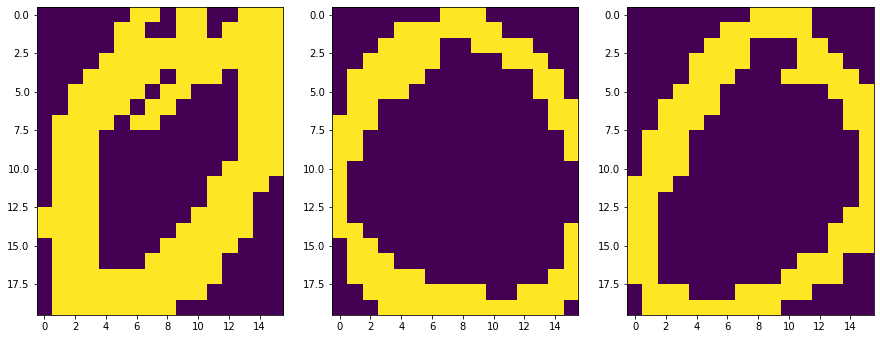


Class 1:


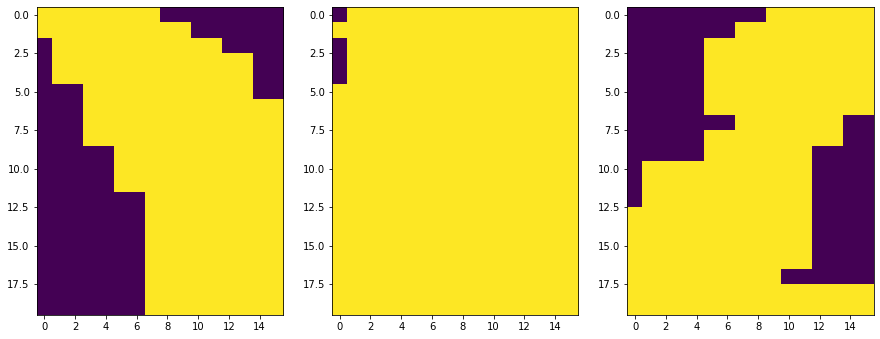


Class 8:


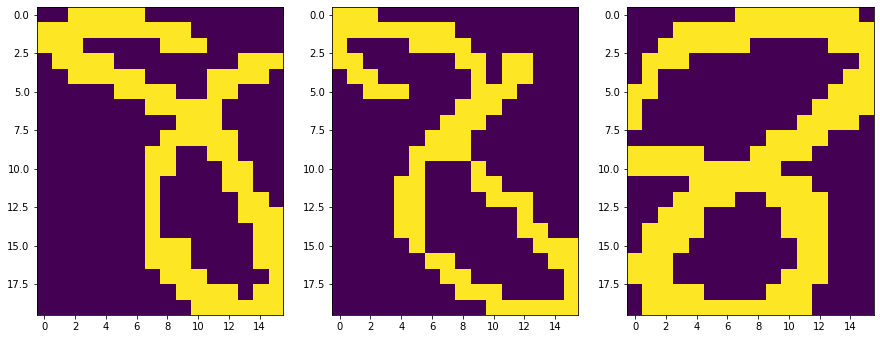


Class 21:


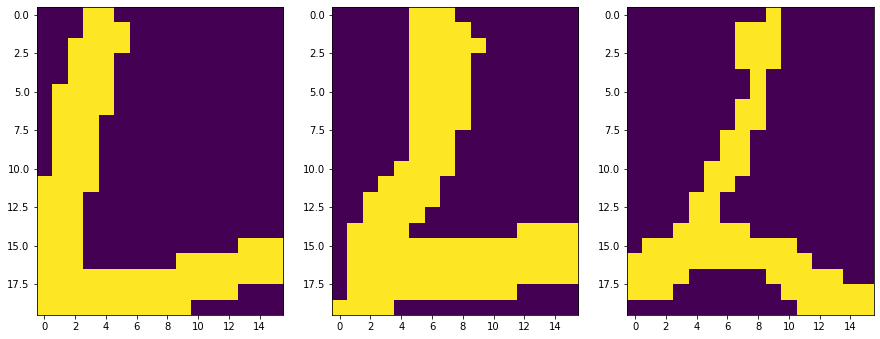


Class 31:


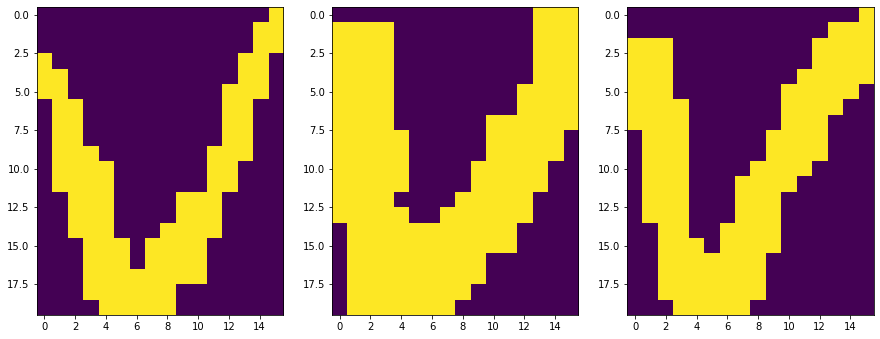

In [41]:
# Number of random classes to output:
nb_classes_to_show = 5
# Examples per class to show:
nb_samples_per_class = 3

# Images to show in one row:
nb_imgs_per_row = 3
# Number of rows:
nb_rows = nb_samples_per_class // nb_imgs_per_row + 1 \
            if nb_samples_per_class % nb_imgs_per_row \
            else nb_samples_per_class // nb_imgs_per_row

# Randomly choose some classes (their indices):
class_indices = np.sort(np.random.choice(
    range(alphadigits['dat'].shape[0]),
    size=nb_classes_to_show
))

# Output some images:
print("Training data examples:")
for class_index in class_indices:
    print(f"\nClass {class_index}:")

    # Choose random samples:
    example_indices = np.random.choice(
        range(alphadigits['dat'].shape[1]),
        size=nb_samples_per_class
    )

    # Output chosen class images:
    plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
    for i, image in enumerate(alphadigits['dat'][class_index, example_indices], 1):
        plt.subplot(nb_rows, nb_imgs_per_row, i)
        plt.imshow(image)
    plt.show()

## Échantillonnage des données

In [42]:
def read_alpha_digits(data, indices):
    dataset = []
    
    for idx in indices:
        dataset += [image.reshape(-1) for image in data[idx]]

    return np.array(dataset)

In [43]:
# Character classes to learn:
train_classes = [10, 11]

In [44]:
dataset = read_alpha_digits(alphadigits['dat'], train_classes)

In [45]:
dataset.shape

(78, 320)

## Entraînement

In [46]:
from rbm import RBM

In [47]:
# Hyperparameters:
HIDDEN_UNITS = 200
LEARNING_RATE = 1E-2

EPOCHS = 500
BATCH_SIZE = 10

In [48]:
rbm = RBM(dataset.shape[-1], HIDDEN_UNITS)

In [49]:
rbm.train(dataset, lr=LEARNING_RATE, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1:
Batch 8: [====================>]. Batch MSE: 0.43359
Epoch average MSE: 0.46518

Epoch 2:
Batch 8: [====================>]. Batch MSE: 0.42227
Epoch average MSE: 0.43278

Epoch 3:
Batch 8: [====================>]. Batch MSE: 0.43672
Epoch average MSE: 0.42314

Epoch 4:
Batch 8: [====================>]. Batch MSE: 0.43125
Epoch average MSE: 0.41953

Epoch 5:
Batch 8: [====================>]. Batch MSE: 0.42930
Epoch average MSE: 0.41999

Epoch 6:
Batch 8: [====================>]. Batch MSE: 0.41328
Epoch average MSE: 0.41162

Epoch 7:
Batch 8: [====================>]. Batch MSE: 0.43164
Epoch average MSE: 0.41958

Epoch 8:
Batch 8: [====================>]. Batch MSE: 0.39062
Epoch average MSE: 0.41258

Epoch 9:
Batch 8: [====================>]. Batch MSE: 0.40937
Epoch average MSE: 0.40992

Epoch 10:
Batch 8: [====================>]. Batch MSE: 0.40430
Epoch average MSE: 0.41897

Epoch 11:
Batch 8: [====================>]. Batch MSE: 0.43242
Epoch average MSE: 0.40874

Epoch 12

## Génération des images

In [50]:
# Image generation parameters:
ITER_GIBBS = 100
NB_IMAGES = 5

In [51]:
test_images = rbm.generate_images(iter_gibbs=ITER_GIBBS, nb_images=NB_IMAGES)

In [52]:
test_images.shape

(5, 20, 16)

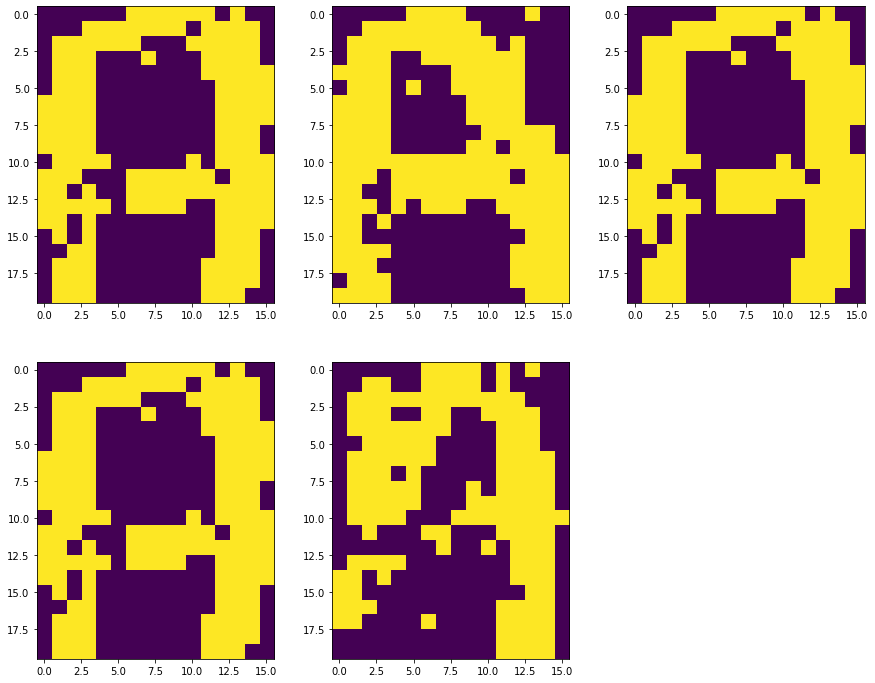

In [54]:
# Number of rows:
nb_rows = NB_IMAGES // nb_imgs_per_row + 1 \
            if NB_IMAGES % nb_imgs_per_row \
            else NB_IMAGES // nb_imgs_per_row

# Output generated images:
print("Generated images:")
plt.figure(figsize=(5 * nb_imgs_per_row, 6 * nb_rows))
for i, image in enumerate(test_images, 1):
    plt.subplot(nb_rows, nb_imgs_per_row, i)
    plt.imshow(image)
plt.show()

## Expériences

## MNIST

In [57]:
# load MNIST data - handwritten digits:
mnist = scipy.io.loadmat('data/mnist_all.mat')

In [65]:
# Merge training and test data for each class:
for class_index in range(10):
    mnist['train' + str(class_index)] = np.concatenate(
        (mnist['train' + str(class_index)],
        mnist['test' + str(class_index)]), axis=0
    )